In [4]:
import pandas as pd


def loadData():
    def toNumber(line):
        l = [float(x.strip()) for x in line]
        l[-1] = int(l[-1])
        return l
    with open('data/square.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        square = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/long.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        longData = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/2d-10c.dat', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()[3:]]
        td10c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/smile.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        smile = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/order2-3clust.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        o23c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/iris.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()[:-1]]
        iris = pd.DataFrame(data, columns = ['x', 'y', 'w', 'z', 'label'])
    return square, longData, td10c, smile, o23c, iris

square, longData, td10c, smile, o23c, iris = loadData()
datasets = [(square, 'Square'), (longData, 'Long'), (td10c, '2d-10c'), (smile, 'Smile'), (o23c, 'Order2-3clust'), (iris, 'Iris')]

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score


def plotData(data):
    plt.scatter(data.x, data.y, c = data.label)
    plt.show()

def plotDataWithError(data, classified):
    print("Error %.4lf:" % min(1 - adjusted_rand_score(data.label, classified), 1))
    plt.scatter(data.x, data.y, c = classified)
    plt.show()

Real Clusters
Square


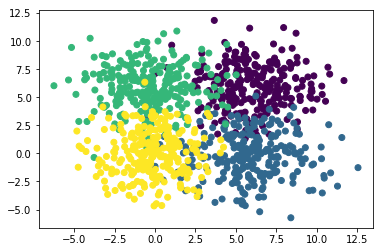

Long


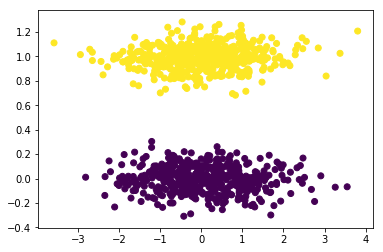

2d-10c


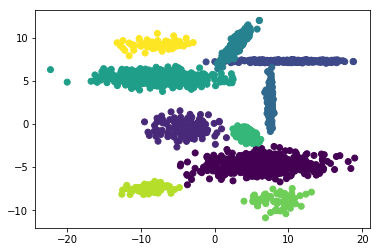

Smile


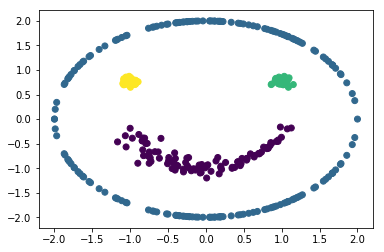

Order2-3clust


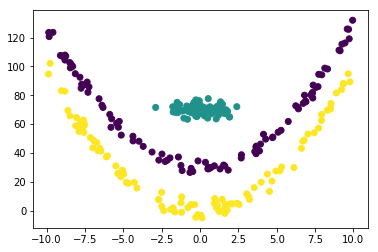

Iris


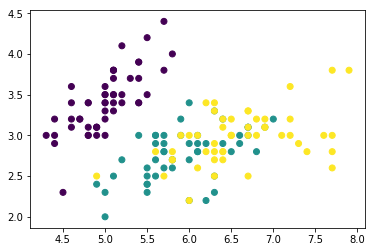

In [162]:
print('Real Clusters')
for data in datasets:
    print(data[1])
    plotData(data[0])

In [144]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture


def singleLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='single')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def completeLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='complete')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def averageLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='average')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def wardLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='ward')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)

def DBScan(data):
    cluster = DBSCAN().fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def kMeans(data):
    cluster = KMeans(n_clusters=len(set(data.label))).fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def EMClust(data):
    EMLabels = GaussianMixture(n_components=len(set(data.label))).fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, EMLabels)

Single Link
Square
Error 1.0000:


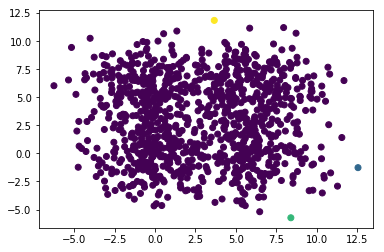

Long
Error 1.0000:


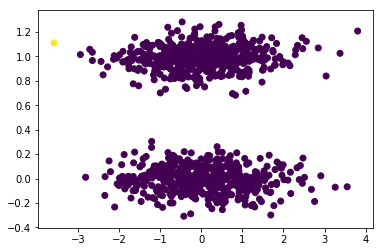

2d-10c
Error 0.6952:


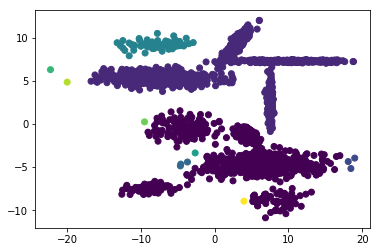

Smile
Error 0.0000:


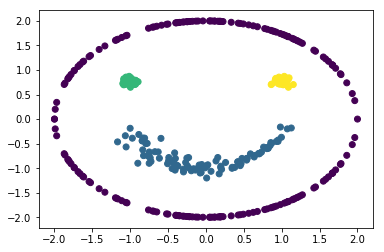

Order2-3clust
Error 0.9960:


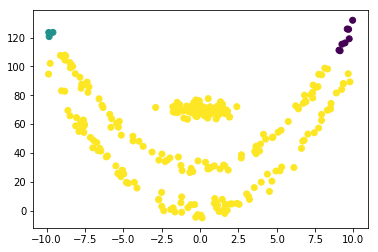

Iris
Error 0.4362:


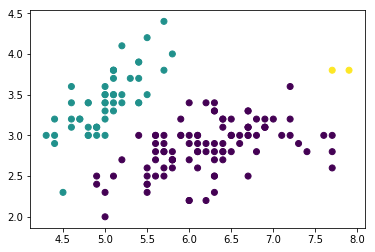

In [156]:
print('Single Link')
for data in datasets:
    print(data[1])
    singleLink(data[0])

Complete Link
Square
Error 1.0000:


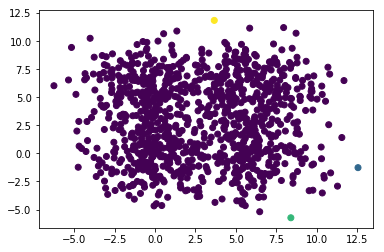

Long
Error 1.0000:


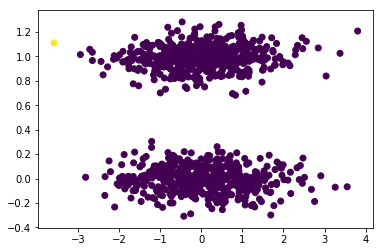

2d-10c
Error 0.6952:


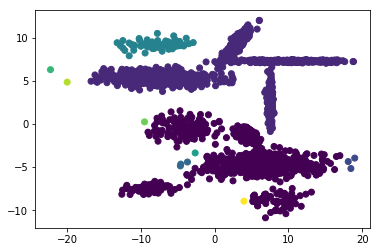

Smile
Error 0.0000:


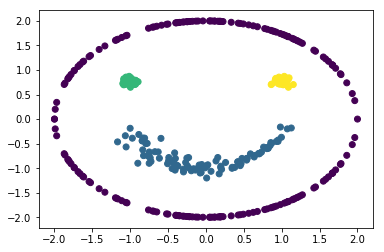

Order2-3clust
Error 0.9960:


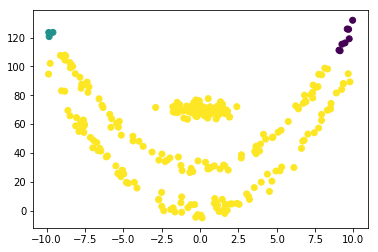

Iris
Error 0.4362:


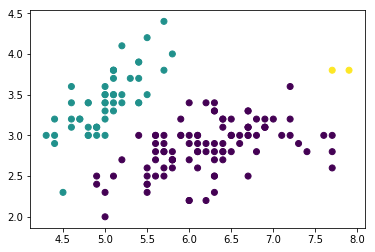

In [155]:
print('Complete Link')
for data in datasets:
    print(data[1])
    singleLink(data[0])

Average Link
Square
Error 1.0000:


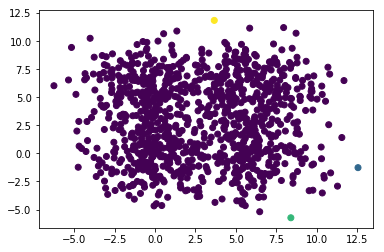

Long
Error 1.0000:


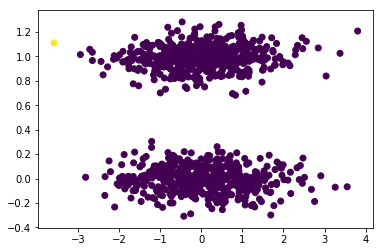

2d-10c
Error 0.6952:


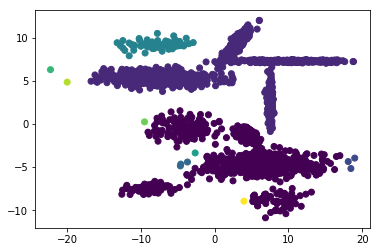

Smile
Error 0.0000:


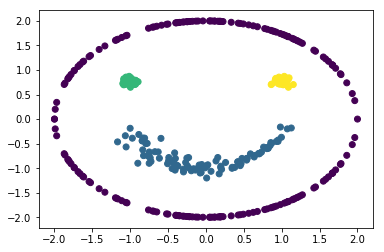

Order2-3clust
Error 0.9960:


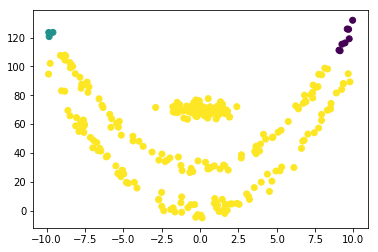

Iris
Error 0.4362:


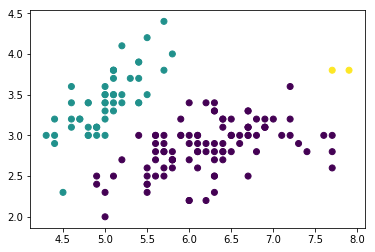

In [154]:
print('Average Link')
for data in datasets:
    print(data[1])
    singleLink(data[0])

Ward Link
Square
Error 1.0000:


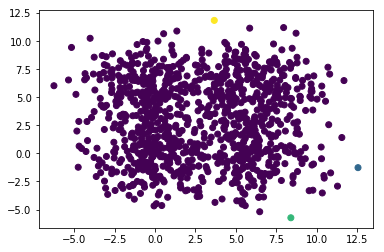

Long
Error 1.0000:


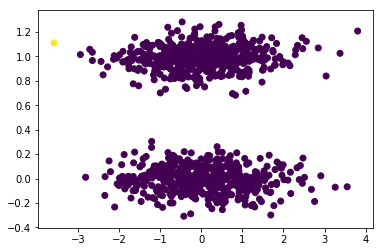

2d-10c
Error 0.6952:


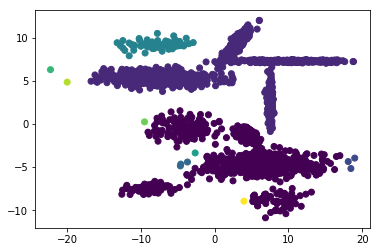

Smile
Error 0.0000:


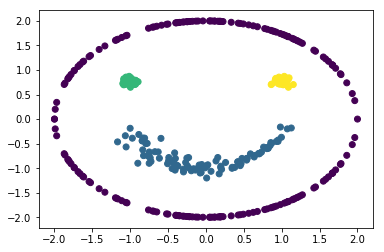

Order2-3clust
Error 0.9960:


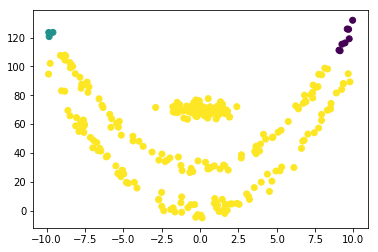

Iris
Error 0.4362:


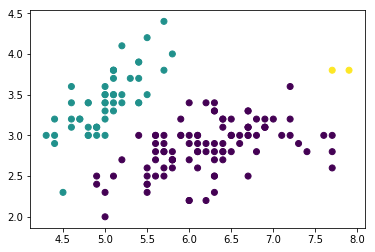

In [153]:
print('Ward Link')
for data in datasets:
    print(data[1])
    singleLink(data[0])

DBSCAN
Square
Error 0.7958:


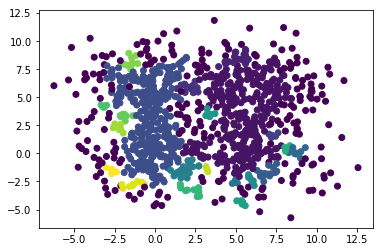

Long
Error 1.0000:


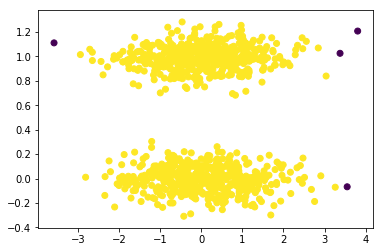

2d-10c
Error 0.1324:


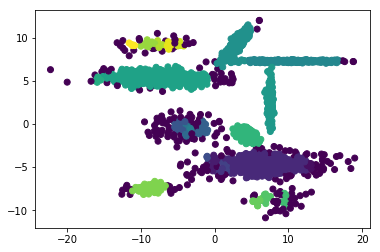

Smile
Error 0.0055:


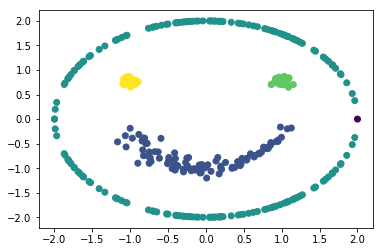

Order2-3clust
Error 0.9464:


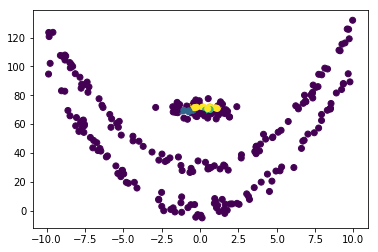

Iris
Error 0.4794:


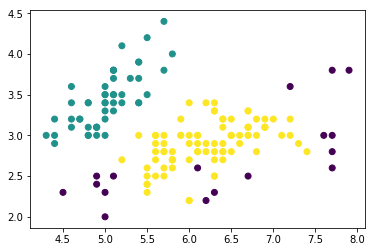

In [152]:
print('DBSCAN')
for data in datasets:
    print(data[1])
    DBScan(data[0])

K-Means
Square
Error 0.3091:


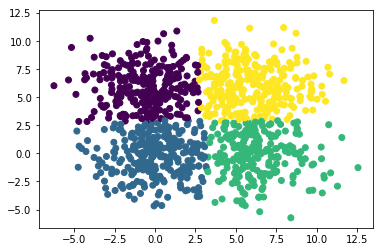

Long
Error 1.0000:


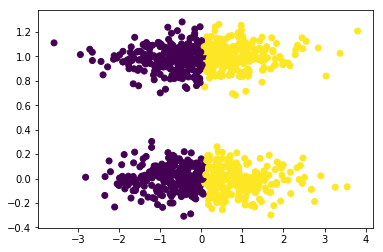

2d-10c
Error 0.2765:


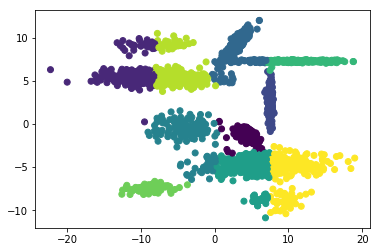

Smile
Error 0.8148:


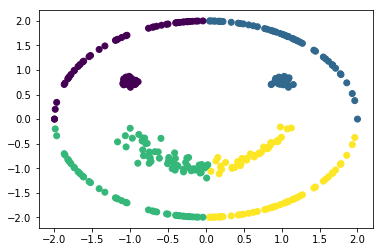

Order2-3clust
Error 0.7578:


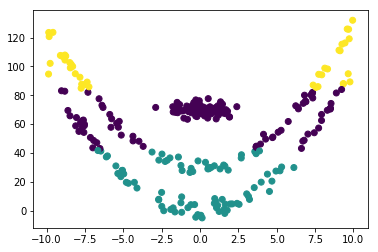

Iris
Error 0.2698:


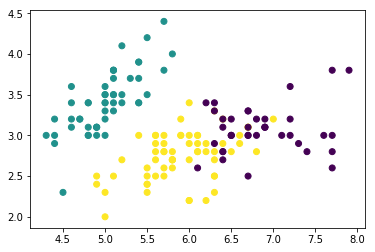

In [151]:
print('K-Means')
for data in datasets:
    print(data[1])
    kMeans(data[0])

EM Algorithm
Square
Error 0.3245:


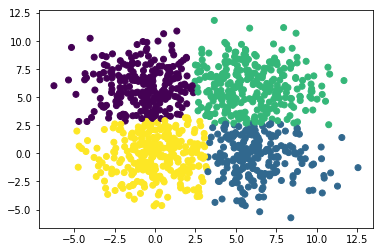

Long
Error 0.9846:


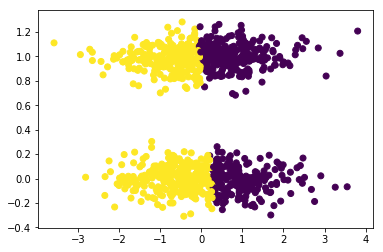

2d-10c
Error 0.0018:


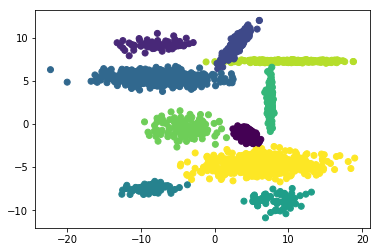

Smile
Error 0.7328:


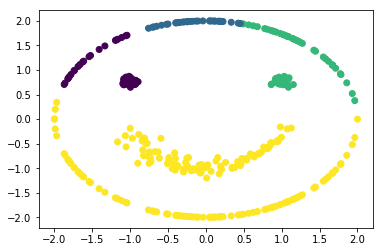

Order2-3clust
Error 0.6191:


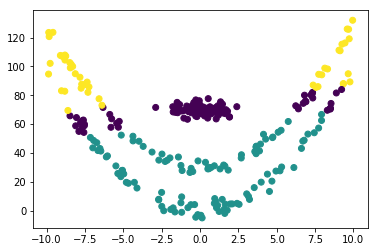

Iris
Error 0.0961:


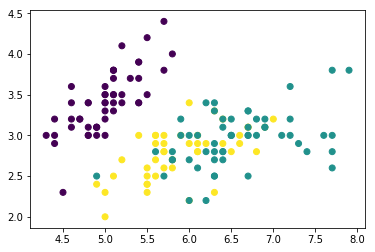

In [150]:
print('EM Algorithm')
for data in datasets:
    print(data[1])
    EMClust(data[0])

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Error 0.9692:


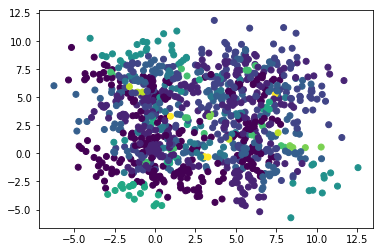

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Error 0.7298:


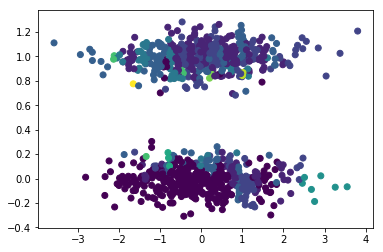

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Error 0.8805:


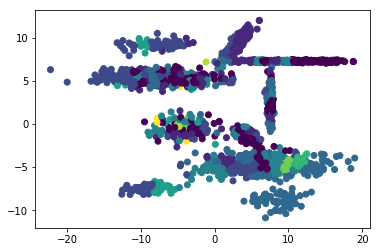

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Error 0.8892:


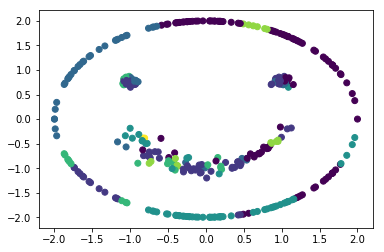

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Error 0.9496:


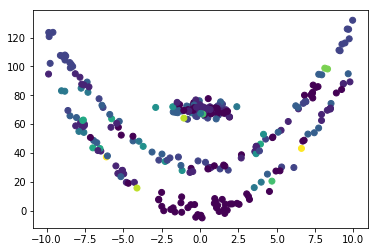

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Error 0.6779:


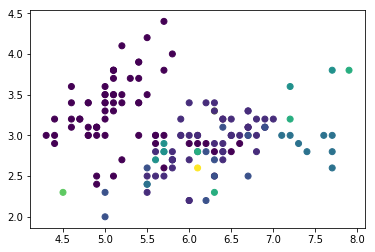

In [54]:
import SimpSOM as sps
import numpy as np

for data, _ in datasets:
    perm = np.random.permutation(len(data))
    raw_data = data.values[:, :-1][perm]
    
    net = sps.somNet(20, 20, raw_data)
    net.train(0.01, 400)
    clusters = net.cluster(data.values[:, :-1], type='qthresh')
    
    labels = np.zeros(len(data))
    for cidx, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cidx
    
    plotDataWithError(data, labels)